# KNN on iris data set for classification of species

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [46]:
df.shape

(150, 5)

In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# check for linearity

In [6]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


# check for normality using skewness and kurtosis

In [7]:
for i in df:
    print(f'{i}: skewness {stats.skew(df[i])}, Kurtosis {stats.kurtosis(df[i])}')

SepalLengthCm: skewness 0.3117530585022963, Kurtosis -0.5735679489249765
SepalWidthCm: skewness 0.330702812773315, Kurtosis 0.24144329938318343
PetalLengthCm: skewness -0.2717119501716388, Kurtosis -1.3953593021397128
PetalWidthCm: skewness -0.10394366626751729, Kurtosis -1.3352456441311857
Species: skewness 0.0, Kurtosis -1.5


# check for multicolinearity

In [8]:
df.iloc[:,:-1].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### here if this was a linear regression or logistic regression we shall have to remove SepalLengthCM and SepalWidthCM column as their relevance from the above three checks seems abismal

### Since KNN is non parametric these data manipulations are not required

### Hence we shall move forward with our model and train test split but first we shall split predictors from target

In [9]:
X = df.iloc[:,:-1]
y = df.Species

In [10]:
from sklearn.model_selection import train_test_split
c
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=212)
# lets initially try with 3 neighbours
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.9736842105263158

In [13]:
pd.crosstab(y_test, y_predict)

col_0,0,1,2
Species,,,
0,11,0,0
1,0,12,0
2,0,1,14


# here only one virginica has been wrongly classified as versi color

# but lets further ourselves with classification report to check the precision recall and f1_score of our model

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



<AxesSubplot:xlabel='col_0', ylabel='Species'>

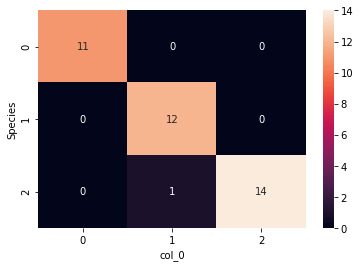

In [18]:
sns.heatmap(pd.crosstab(y_test, y_predict), annot=True)

# we can even check for outliers using two methods - z score and percentile method or visualize using our box plot

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

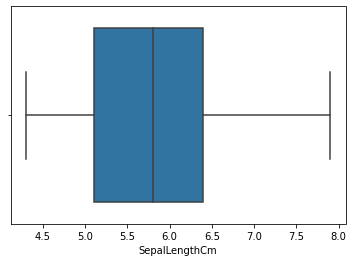

In [21]:
# function to plot box plots of our data frame
# lets also define a function that returns z score of all of the columns of our data frame

def z_score(df):
    return {i: stats.zscore(df[i]) for i in df}

sns.boxplot(df.SepalLengthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

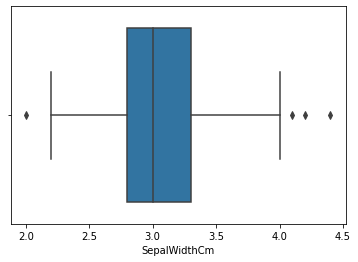

In [22]:
sns.boxplot(df.SepalWidthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

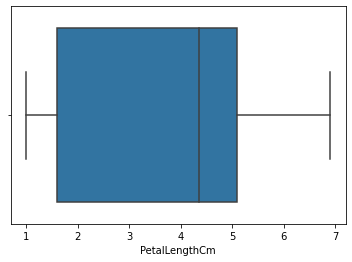

In [23]:
sns.boxplot(df.PetalLengthCm)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

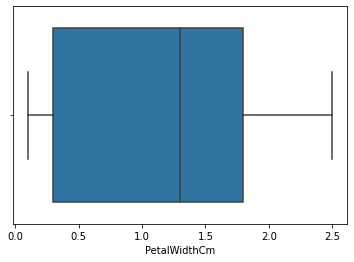

In [24]:
sns.boxplot(df.PetalWidthCm)

Only our column sepalwidth cm has some outlier so lets remove them using zscore method

In [25]:
z_score = z_score(df.iloc[:,:-1])

In [26]:
z_score

{'SepalLengthCm': array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
        -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
        -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
        -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
        -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
        -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
        -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
        -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
        -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
        -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
         1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
        -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
        -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
         1.03800476, -0.29484182, 

In [27]:
df_outlier_free = df[np.abs(z_score.get('SepalWidthCm')) <= 3]
df_outlier_free.shape

(149, 5)

In [28]:
df.shape

(150, 5)

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

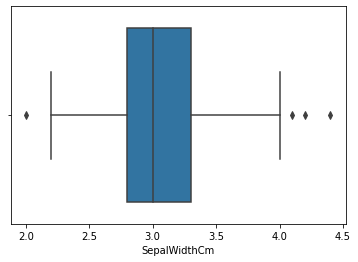

In [29]:
sns.boxplot(df.SepalWidthCm)

### so our z-score method has not completely removed the outliers so lets try the percentile method

In [30]:
df_outlier_free.SepalWidthCm.quantile(0.998)

4.170400000000001

In [32]:
df_perr = df_outlier_free[df_outlier_free.SepalWidthCm <= df_outlier_free.SepalWidthCm.quantile(0.998)]
df_perr.shape

(148, 5)

In [34]:
df_perr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

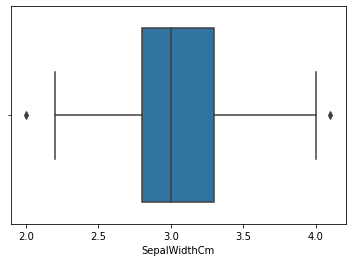

In [36]:
sns.boxplot(df_perr.SepalWidthCm)

## we can remove these outliers by reducing the percentile rank and testing using box plot

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

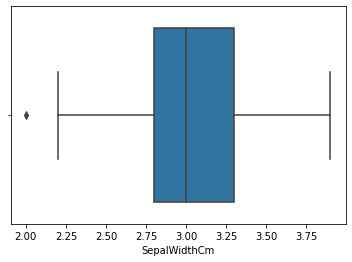

In [37]:
df_perr2 = df_perr[df_perr.SepalWidthCm <= df_perr.SepalWidthCm.quantile(0.98)]
sns.boxplot(df_perr2.SepalWidthCm)

# now all the outliers on the right side are removed lets remove the left side outlier using percentile rank

In [40]:
df_perr3 = df_perr2[df_perr2.SepalWidthCm >= df_perr2.SepalWidthCm.quantile(0.01)]

print(df_perr2.shape, df_perr3.shape)

(146, 5) (145, 5)


/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

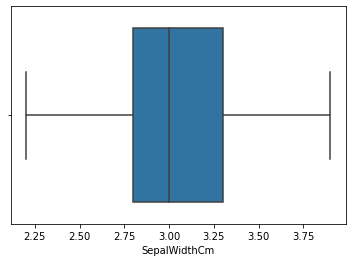

In [41]:
sns.boxplot(df_perr3.SepalWidthCm)

# and hence we removed all the outliers now lets try building the KNN model again to see it it creates any difference

In [43]:
X = df_perr3.iloc[:,:-1]
y = df_perr3.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

1.0

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



<AxesSubplot:xlabel='col_0', ylabel='Species'>

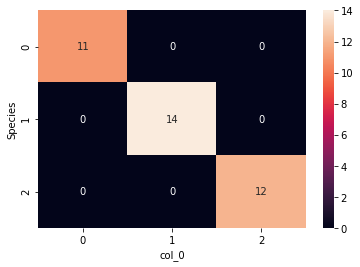

In [47]:
sns.heatmap(pd.crosstab(y_test, y_predict), annot=True)